# BRAIN Cancer - No Feature Extraction method (NFE) on selected features

In [1]:
#Import packages
import pandas as pd
import numpy as np

#import xgboost
from xgboost import XGBClassifier, plot_importance

#import sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate 
from sklearn.metrics import *
from sklearn import metrics

import shap

import os

import  warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Preprocessing of data 

We run the NFE model which corresponds to XGBoost model.

## Load data and declare feature vector and target variable

In [2]:
df = pd.read_csv("/Users/justine_labory/Desktop/github/plantnet/Metabolomic_project/brain_project/data/BRAIN_T.269.Feat.Select.csv")
X=df.drop("Label", axis=1)
y=df["Label"]

In [3]:
X.head()

,POS_MZ491.633851739059_RT13.287046176868197,POS_MZ477.29239252562166_RT13.242233814241667,POS_MZ511.98536206448625_RT13.356487475063043,POS_MZ678.9182826221901_RT13.138941322713695,POS_MZ599.701117076718_RT13.581358335174386,POS_MZ409.259084978251_RT12.966673996034809,POS_MZ585.3613486363812_RT13.578173327966944,POS_MZ433.2750250705136_RT13.082419609106726,POS_MZ492.30192205514356_RT12.945232260726588,NEG_MZ96.95868535195628_RT1.5232856526881717,...,POS_MZ190.08635855759917_RT9.66977196404359,POS_MZ172.06055647615017_RT3.013318866504976,POS_MZ230.18580324885238_RT10.524623393640278,POS_MZ144.03518070046294_RT3.127406319929157,POS_MZ208.99674384956484_RT2.269478952612698,POS_MZ191.01962866965061_RT2.169242759967193,POS_MZ114.0319840645615_RT2.599377356221023,POS_MZ203.17680801999572_RT2.9070696255418498,NEG_MZ230.01241499909418_RT9.202077783265304,POS_MZ119.04748383672113_RT2.749333539647993
0,940908600.0,475648100.0,309716400.0,266824700.0,207397100.0,206201400.0,180905000.0,172260400.0,153725600.0,107786100.0,...,16065.84,14781.39,12316.5,11945.04,11904.12,9783.462,8130.962,8130.669,5.339815e+03,3380.98
1,930000000.0,403000000.0,272000000.0,225000000.0,221000000.0,201000000.0,208000000.0,70900000.0,156000000.0,78100000.0,...,1242450.00,290580.80,270628.3,27638.35,118292.70,60699.160,371207.700,283159.600,1.490000e+07,53461.70
2,858000000.0,416000000.0,183000000.0,196000000.0,164000000.0,149000000.0,172000000.0,75600000.0,137000000.0,35100000.0,...,112663.70,67254.09,35067.0,59173.71,92200.67,127865.900,375985.900,17360.270,1.170420e+06,70545.81
3,792000000.0,389000000.0,199000000.0,167000000.0,164000000.0,135000000.0,151000000.0,78700000.0,127000000.0,154000000.0,...,697301.80,375225.90,476638.0,298656.60,82899.89,88459.160,135546.300,1341759.000,5.295978e+06,82386.26
4,601000000.0,265000000.0,296000000.0,208000000.0,203000000.0,140000000.0,189000000.0,52500000.0,99300000.0,364000000.0,...,23133.95,199449.80,235403.0,34251.62,281868.60,354385.500,534450.200,12738.810,1.261109e+05,39904.96


In [4]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Label, dtype: int64

### Run XGBoost model with cross validation

[[ 7  2]
 [ 3 10]]
0.7727272727272727
0.7735042735042735
0.8
0.8333333333333334
0.7692307692307693
0.7735042735042735


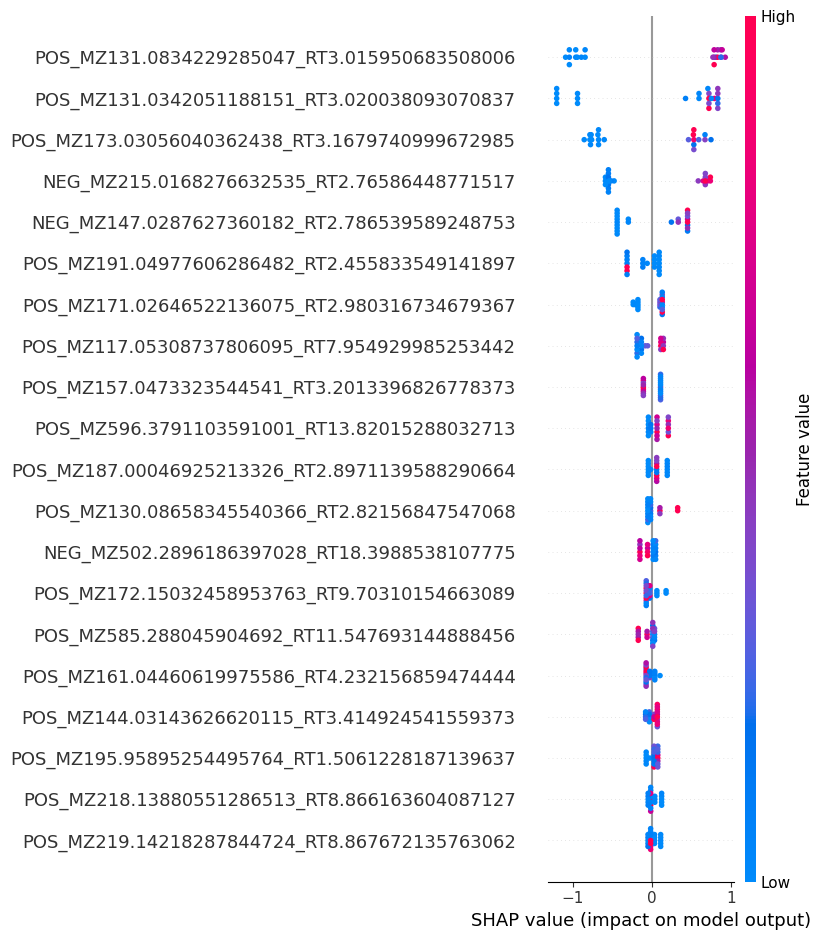

[[ 7  2]
 [ 1 12]]
0.8636363636363636
0.8504273504273505
0.888888888888889
0.8571428571428571
0.9230769230769231
0.8504273504273504


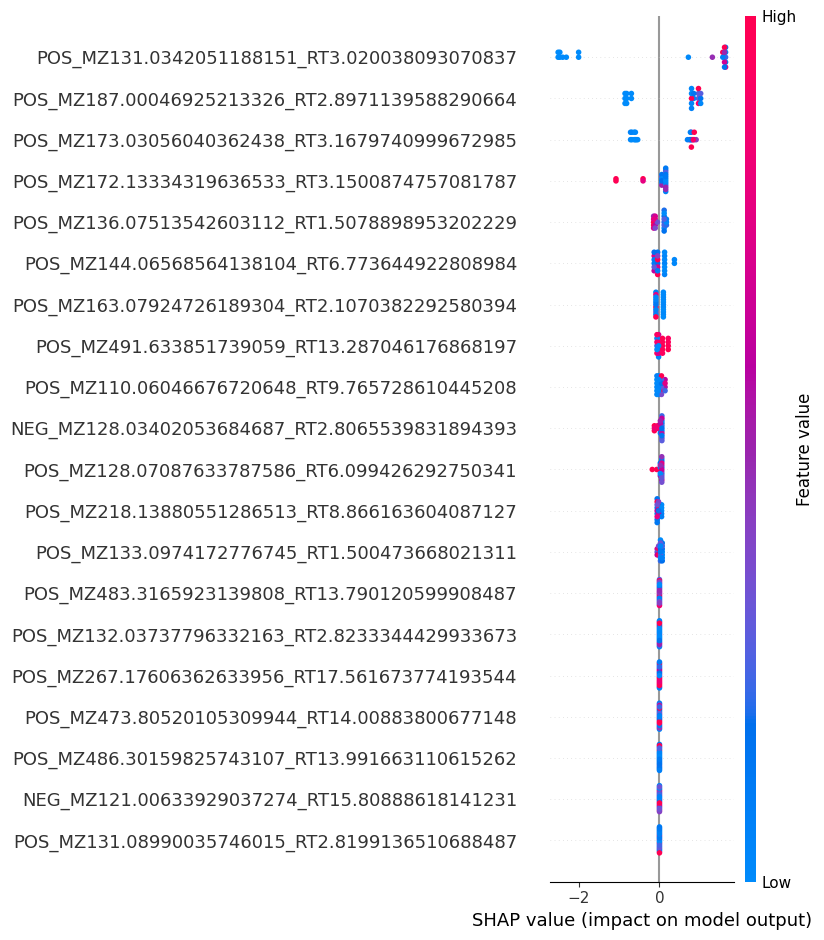

[[10  0]
 [ 0 12]]
1.0
1.0
1.0
1.0
1.0
1.0


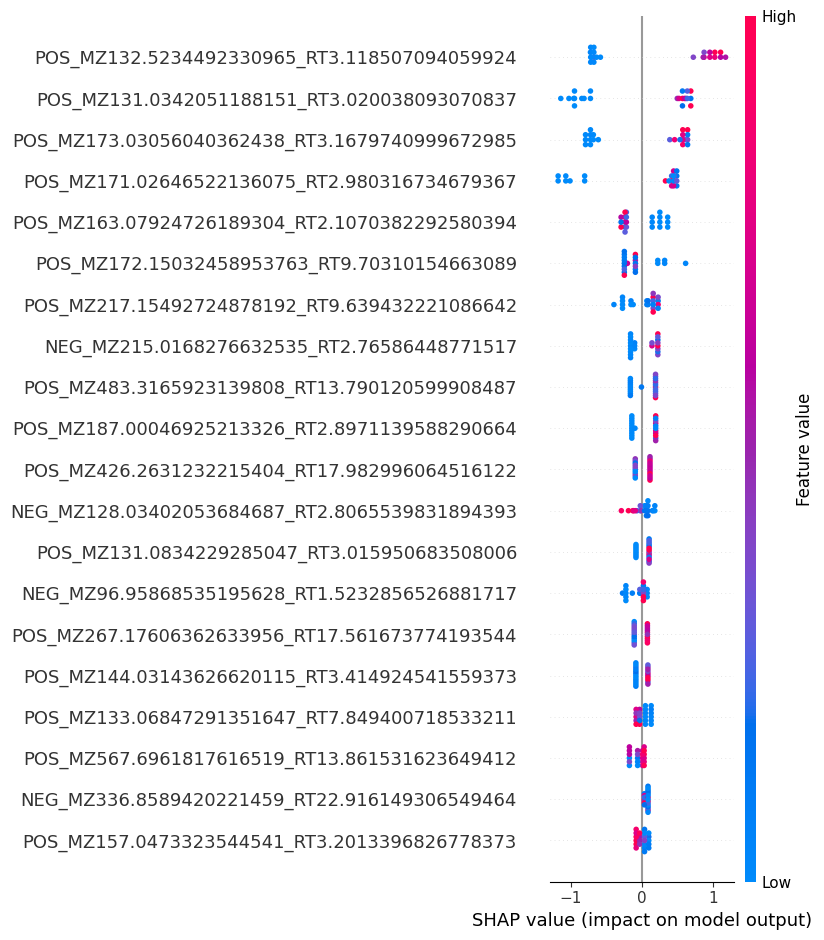

[[ 9  1]
 [ 0 12]]
0.9545454545454546
0.95
0.9600000000000001
0.9230769230769231
1.0
0.9500000000000001


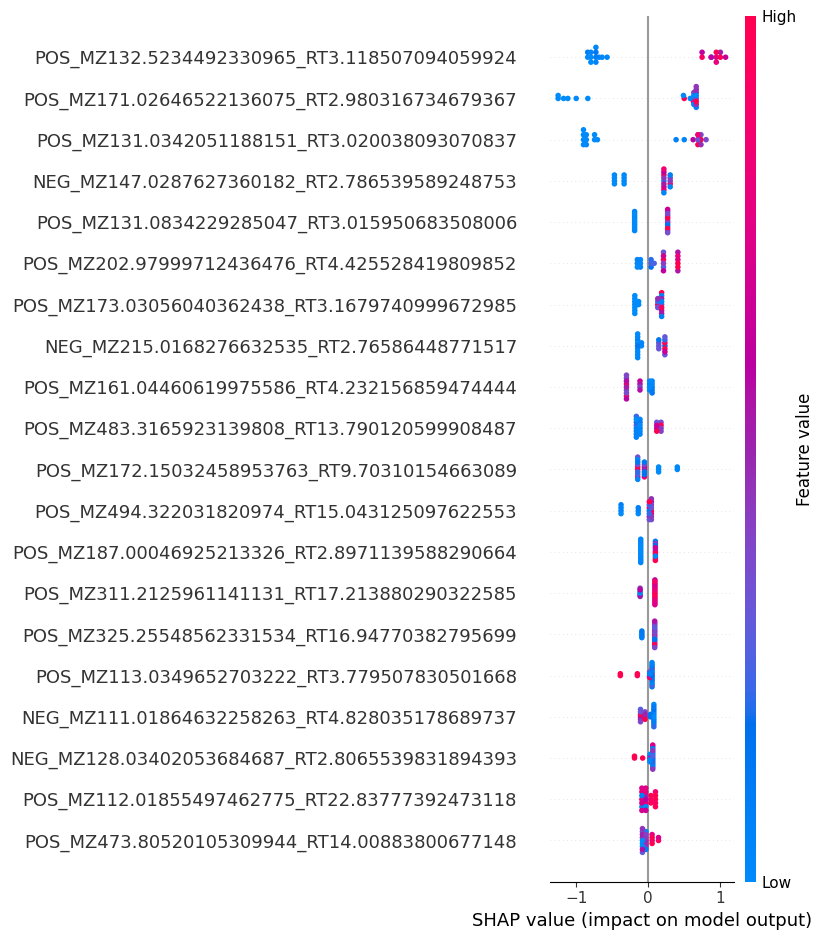

In [5]:
kfold = StratifiedKFold(n_splits=4)

lst_df = []

df_metrics = pd.DataFrame(columns=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score',
                                   'roc_auc', 'specificity'],
                         index = ['fold1', 'fold2', 'fold3', 'fold4'])

cnt_fold = 1

for train_index,test_index in kfold.split(X,y):
    
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_test=y.iloc[test_index]


    xgboost = XGBClassifier(seed=1234)

    xgboost = xgboost.fit(X_train,y_train)
    y_pred_proba = xgboost.predict_proba(X_test)[:,1]
    # # Get predicted probability
    y_pred = xgboost.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    spe= tn / (tn + fp)
    
    # Fill in the dataframe with metrics
    df_metrics.iloc[(cnt_fold -1)] = [acc, bal_acc, f1score, precision, recall, roc_auc, spe]
    
    print(acc)
    print(bal_acc)
    print(f1score)
    print(precision)
    print(recall)
    print(roc_auc)

#     Add feature importance with SHAP

    explainer = shap.TreeExplainer(xgboost)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

    cnt_fold+=1

## Compute mean and standard deviation of metrics

In [6]:
print(f'The mean accuracy is: {np.mean(df_metrics["accuracy"])*100:.1f} (±{np.std(df_metrics["accuracy"])*100:.1f}) ')
print(f'The mean balanced accuracy is: {np.mean(df_metrics["balanced_accuracy"])*100:.1f} (±{np.std(df_metrics["balanced_accuracy"])*100:.1f}) ')
print(f'The mean precision is: {np.mean(df_metrics["precision"])*100:.1f} (±{np.std(df_metrics["precision"])*100:.1f}) ')
print(f'The mean recall is: {np.mean(df_metrics["recall"])*100:.1f} (±{np.std(df_metrics["recall"])*100:.1f}) ')
print(f'The mean F1 score is: {np.mean(df_metrics["f1score"])*100:.1f} (±{np.std(df_metrics["f1score"])*100:.1f}) ')
print(f'The mean ROC AUC is: {np.mean(df_metrics["roc_auc"])*100:.1f} (±{np.std(df_metrics["roc_auc"])*100:.1f}) ')
print(f'The mean specificity is: {np.mean(df_metrics["specificity"])*100:.1f} (±{np.std(df_metrics["specificity"])*100:.1f}) ')

The mean accuracy is: 89.8 (±8.7) 
The mean balanced accuracy is: 89.3 (±8.8) 
The mean precision is: 91.2 (±7.6) 
The mean recall is: 90.3 (±6.5) 
The mean F1 score is: 92.3 (±9.4) 
The mean ROC AUC is: 89.3 (±8.8) 
The mean specificity is: 86.4 (±9.3) 


## Compute 95% CI

In [7]:
acc_ci= np.percentile(df_metrics["accuracy"], [2.5,97.5])
bal_acc_ci= np.percentile(df_metrics["balanced_accuracy"], [2.5,97.5])
precision_ci = np.percentile(df_metrics["precision"], [2.5,97.5])
recall_ci= np.percentile(df_metrics["recall"], [2.5,97.5])
f1_ci = np.percentile(df_metrics["f1score"], [2.5,97.5])
roc_auc_ci = np.percentile(df_metrics["roc_auc"], [2.5,97.5])
specificity_ci = np.percentile(df_metrics['specificity'], [2.5,97.5])

print(f'The confidence interval for accuracy is [{acc_ci[0]*100:.1f} ; {acc_ci[1]*100:.1f}]')
print(f'The confidence interval for balanced accucary is [{bal_acc_ci[0]*100:.1f} ; {bal_acc_ci[1]*100:.1f}]')
print(f'The confidence interval for precision is [{precision_ci[0]*100:.1f} ; {precision_ci[1]*100:.1f}]')
print(f'The confidence interval for recall is [{recall_ci[0]*100:.1f} ; {recall_ci[1]*100:.1f}]')
print(f'The confidence interval for F1 score is [{f1_ci[0]*100:.1f} ; {f1_ci[1]*100:.1f}]')
print(f'The confidence interval for ROC AUC score is [{roc_auc_ci[0]*100:.1f} ; {roc_auc_ci[1]*100:.1f}]')
print(f'The confidence interval for specificity score is [{specificity_ci[0]*100:.1f} ; {specificity_ci[1]*100:.1f}]')

The confidence interval for accuracy is [78.0 ; 99.7]
The confidence interval for balanced accucary is [77.9 ; 99.6]
The confidence interval for precision is [80.7 ; 99.7]
The confidence interval for recall is [83.5 ; 99.4]
The confidence interval for F1 score is [78.1 ; 100.0]
The confidence interval for ROC AUC score is [77.9 ; 99.6]
The confidence interval for specificity score is [77.8 ; 99.2]
